**STA130 HOMEWORK FOUR - EVELYN JIN**

**RELEVANT CHATBOT SUMMARIES:** https://chatgpt.com/share/66fae225-794c-800a-b86b-1b70cabcbc37

**PART ONE: PRELECTURE**

The standard deviation of the original data measures the spread (variability) of individual data points in a dataset.

The standard error of the mean (SEM)measures the variability of the sample mean across different samples from the same population. It indicates how accurately the sample mean estimates the "true" population mean.


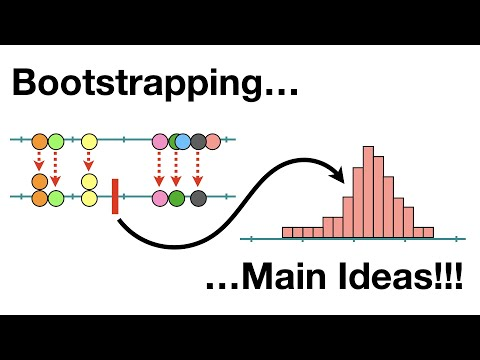

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

**PART TWO: PRELECTURE**

To create a 95% confidence interval using the "standard error of the mean" (SEM), you first calculate the SEM (which gives an estimate of how much the sample mean might vary if we were to take multiple samples). Then you multiply the SEM by z-score given the confidence level which means 95% of the values lie within (z-score) standard deviations from the mean. So, multiplying the SEM provides the margin of error for a 95% confidence level.
Finally you add and subtract this margin from the sample mean which creates the lower and upper bounds of the confidence interval. The resulting confidence interval is the range within which should contain 95% of the bootstrapped sample means to fall (estimate of where the true population mean likely lies).

**PART THREE: PRELECTURE**

To create a 95% bootstrapped confidence interval using the bootstrapped sample means, without relying on the standard error, first randomly resample (with replacement) from the original dataset multiple times and calculate the mean for each resample. Second, sort the bootstrapped means by ordering the bootstrapped means in ascending order. Find the percentiles that correspond to the lower and upper bounds of the 95% confidence interval. We can find the range that contains 95% of the bootstrapped means, directly providing the 95% confidence interval based on the distribution of the bootstrapped means, without calculating the standard error.

**PART FOUR: PRELECTURE**

In [3]:
import numpy as np

# Example sample data
sample = [12, 15, 14, 10, 9, 13, 17, 19, 15, 11]

# Define the number of bootstrap samples
n_iterations = 1000
n_size = len(sample)

# Create an empty array to store the bootstrap sample medians
bootstrap_medians = []

# Perform the bootstrap process
for i in range(n_iterations):
    # Randomly sample with replacement from the original sample
    bootstrap_sample = np.random.choice(sample, size=n_size, replace=True)
    
    # Calculate the median of the bootstrap sample and store it
    bootstrap_medians.append(np.median(bootstrap_sample))

# Calculate the 2.5th and 97.5th percentiles for a 95% confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Print the 95% confidence interval for the median
print(f"95% Bootstrap Confidence Interval for the Median: ({lower_bound}, {upper_bound})")


95% Bootstrap Confidence Interval for the Median: (11.0, 16.0)


**chatbot logs:**
https://chatgpt.com/share/66fae263-10c0-800a-aea4-362f84759747

**PART FIVE: POST LECTURE**

Distinguishing between the population parameter and the sample statistic is important for confidence intervals because the sample statistic estimates the unknown population parameter, which leads to variability due to sampling. This variability reveals the uncertainty around our estimate, allowing us to interpret results more accurately. Confidence intervals also provide a range of possible values for the population parameter (which is based on the uncertainty). 

**chatbot logs:** https://chatgpt.com/share/66fae365-1000-800a-89ff-2a5136754537

**PART SIX: POST LECTURE**

***What is the process of bootstrapping?***

Bootstrapping is when you take your original sample and randomly pick data points from it multiple times, allowing repeats. This helps you create new samples to estimate things like averages without needing the whole population. You take your sample (let's say 10 marbles) and randomly pick from it multiple times, allowing repeats. This creates lots of "new" samples, which you can use to calculate statistics like the average. It’s a way to simulate what the population might look like without having to measure everything.

***What is the main purpose of bootstrapping?***

The main purpose is to figure out how much uncertainty there is around a statistic. It helps you see how reliable your sample is for making guesses about the whole population. By analyzing all the averages from your bootstrapped samples, you can understand how reliable your original sample statistic is when making inferences about the entire population.

***How could you use bootstrapping to assess whether your (hypothesized) guess might be plausible?***

If you guess the average weight of marbles is 50 grams, you can bootstrap by making lots of new samples from your original data and calculating their averages. If most averages are around 50 grams, your guess seems plausible; if not, it might be wrong.

**PART SEVEN: POST LECTURE**

A confidence interval that overlaps zero indicates that the estimated effect (like the drug’s impact) could include no effect at all. This means we can’t confidently say there’s a significant difference from zero, even if the observed sample mean is not zero. The presence of zero in the interval suggests that the true population effect could be negligible, which leads us to "fail to reject the null hypothesis" of no effect.

To reject the null hypothesis, the confidence interval would need to exclude zero entirely. This would mean that the sample data strongly suggests a significant effect—whether positive or negative. If the entire confidence interval is above or below zero, we can confidently assert that the drug does have an average effect, prompting us to reject the null hypothesis.

**PART EIGHT: POST LECTURE**

**Problem Introduction**

In this analysis, we will evaluate the effectiveness of a new vaccine developed by AliTech. We will assess whether there is a significant difference in health scores before and after taking the vaccine. Our primary hypothesis is that the vaccine has no effect on health scores.

**Explanation of the Null Hypothesis**

In this context, the null hypothesis (H₀) posits that the vaccine has no effect on patients' health scores, meaning any observed change in health scores can be attributed to random variation rather than the vaccine itself. The alternative hypothesis (H₁) suggests that the vaccine does have a significant effect on health scores.

**Data Visualization**

To visualize the differences in health scores before and after vaccination, we can create box plots that display the distribution of initial and final health scores.

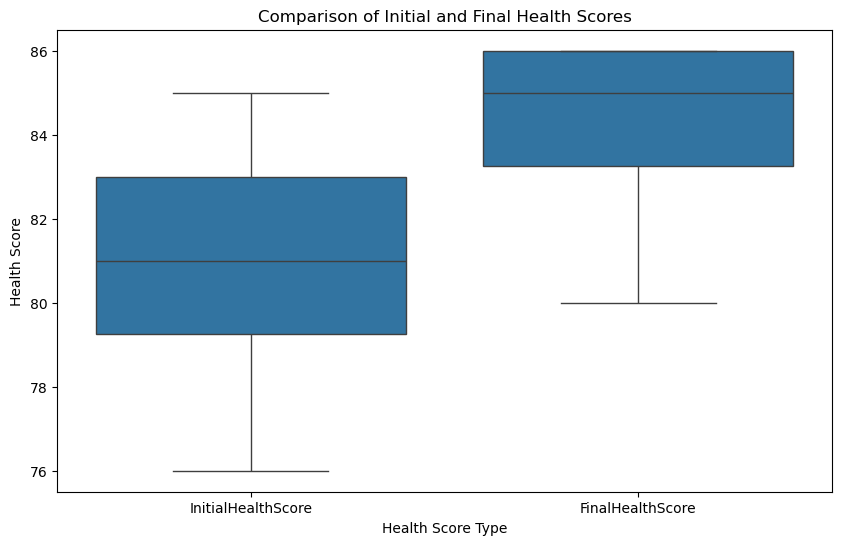

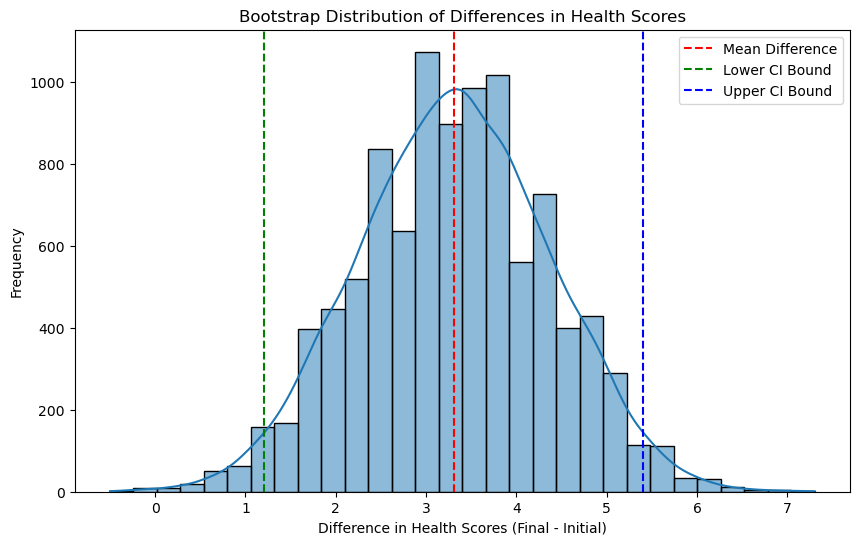

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Data Visualization: Box plot for Initial and Final Health Scores
melted_data = data.melt(id_vars=['PatientID', 'Age', 'Gender'], 
                         value_vars=['InitialHealthScore', 'FinalHealthScore'],
                         var_name='HealthScoreType', 
                         value_name='HealthScore')

plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthScoreType', y='HealthScore', data=melted_data)
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xlabel('Health Score Type')
plt.show()

# Bootstrap sampling
np.random.seed(42)  # For reproducibility
n_bootstrap = 10000
bootstrap_diffs = []

for _ in range(n_bootstrap):
    # Sample with replacement for initial and final scores
    boot_initial = np.random.choice(data['InitialHealthScore'], size=len(data), replace=True)
    boot_final = np.random.choice(data['FinalHealthScore'], size=len(data), replace=True)
    bootstrap_diffs.append(boot_final.mean() - boot_initial.mean())

# Calculate confidence interval
lower_bound = np.percentile(bootstrap_diffs, 2.5)
upper_bound = np.percentile(bootstrap_diffs, 97.5)

# Plot bootstrap distribution of differences
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=30, kde=True)
plt.axvline(np.mean(bootstrap_diffs), color='red', linestyle='--', label='Mean Difference')
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower CI Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper CI Bound')
plt.title('Bootstrap Distribution of Differences in Health Scores')
plt.xlabel('Difference in Health Scores (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Quantitative Analysis**

***Observed Difference:***

    The average difference between final and initial health scores is approximately 3.3 points. 
    This suggests that, on average, patients' health scores improved after receiving the vaccine.

***Bootstrap Confidence Interval:*** 

    The 95% confidence interval for the difference in health scores is approximately [1.2,5.4]

**Interpretation**

Since the confidence interval does not include zero, we have evidence to reject the null hypothesis of "no effect." This suggests that the vaccine does have a statistically significant effect on improving health scores.

**Conclusion**

Based on the bootstrapping analysis, we conclude that the vaccine appears to be effective in improving health scores among the patients in this study.

**PART NINE: POST LECTURE**

Yes